## XGBOOST

### Why XGBoost?
https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

TLDR: Its fast and powerful :)

<img src="https://miro.medium.com/max/1920/1*U72CpSTnJ-XTjCisJqCqLg.jpeg"
     alt="Why XGBoost"/>

In [70]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# The output of multiple commands in a cell will be output at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [71]:
# We start by importing the new data set
home_folder = '/Users/anthonymiyoro/Documents/code/DataTho/'

#Load dataset
train_modified = pd.read_csv(home_folder + 'train_modified.csv', encoding = "ISO-8859-1")
test_bundas = pd.read_csv(home_folder + 'test_modified.csv', encoding = "ISO-8859-1")

In [76]:
train_modified.head(5)

,Unnamed: 0,Weight,Visibility,Max_Price,Store_Establishment_Year,Item_Store_Sales,tracker,FatContent_LF,FatContent_Low Fat,FatContent_Regular,...,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3,Store_ID_OUT013,Store_ID_OUT018,Store_ID_OUT019,Store_ID_OUT027,Store_ID_OUT035,Store_ID_OUT046,Store_ID_OUT049
0,1,9.300,0.016047,249.8092,1999,3735.1380,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,5.920,0.019278,48.2692,2009,443.4228,2,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,3,17.500,0.016760,141.6180,1999,2097.2700,3,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,5,8.930,0.000000,53.8614,1987,994.7052,5,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,6,10.395,0.000000,51.4008,2009,556.6088,6,0,0,1,...,0,1,0,0,1,0,0,0,0,0


### Split the data between train and test

We then remove the Item_ID feature as it does not correlate to Sales

In [73]:
train_modified = train_modified.drop('Item_ID', axis=1)
test_bundas = test_bundas.drop('Item_ID', axis=1)

Our scikit learn package requires that the explanatory variables are stored seperately from the outcome variables.

In [74]:
# Data
rf_trainX = train_modified.drop('Item_Store_Sales', axis=1)

# Label
rf_trainY = train_modified['Item_Store_Sales']

# Data
rf_testX = test_bundas.drop('Item_Store_Sales', axis=1)

# Label
rf_testY = test_bundas['Item_Store_Sales']

KeyError: "['Item_Store_Sales'] not found in axis"

Now we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.... It will be used later on in the notebook.

In [47]:
data_dmatrix = xgb.DMatrix(data=rf_trainX,label=rf_trainY)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [48]:
X_train, X_test, y_train, y_test = train_test_split(rf_trainX, rf_trainY, test_size=0.2)

len(X_train)
len(X_test)
len(y_train)
len(y_test)

4887

1222

4887

1222

In [49]:
X_train.head(3)

,Unnamed: 0,Weight,Visibility,Max_Price,Store_Establishment_Year,tracker,FatContent_LF,FatContent_Low Fat,FatContent_Regular,FatContent_low fat,...,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3,Store_ID_OUT013,Store_ID_OUT018,Store_ID_OUT019,Store_ID_OUT027,Store_ID_OUT035,Store_ID_OUT046,Store_ID_OUT049
3802,6932,15.70,0.037232,183.1634,1997,6932,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1903,3479,21.25,0.019423,120.8756,1997,3479,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2870,5228,13.30,0.063513,149.9708,1987,5228,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In order for XGBoost to be able to use our data, we’ll need to transform it into a specific format that XGBoost can handle. 

That format is called DMatrix. We first transform our dataframe to a numoy array after which we can convert it to a DMatrix format. 

In [50]:
X_train.to_numpy()
X_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

array([[6.93200000e+03, 1.57000000e+01, 3.72321100e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.47900000e+03, 2.12500000e+01, 1.94232320e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.22800000e+03, 1.33000000e+01, 6.35132720e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.93000000e+02, 1.97000000e+01, 1.80213610e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.76300000e+03, 1.21000000e+01, 1.68529090e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.60400000e+03, 7.78500000e+00, 1.39436695e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

array([[7.21300000e+03, 1.03000000e+01, 7.01490880e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.08810000e+04, 1.93500000e+01, 5.77623010e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.27500000e+03, 1.78500000e+01, 8.78249670e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.22700000e+03, 1.81000000e+01, 2.23809520e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.33200000e+03, 5.44000000e+00, 2.54587160e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.21000000e+02, 9.80000000e+00, 1.27599399e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

array([5634.6654, 3150.5656, 2106.5912, ..., 1857.582 , 2876.256 ,
       2404.2038])

array([3436.1938, 2145.2076, 1755.7146, ...,  476.047 , 3124.5994,
        120.5098])

In [51]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

We then define the parameters of our XGBoost model as shown below:

We use eta to prevent overfitting in our ensemble model as shown below: https://www.datacamp.com/community/tutorials/xgboost-in-python

#### We now train the model as shown below:

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [52]:
#reg:squarederror replaces reg:linear
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [53]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

r2_score = r2_score(y_test, preds)
print("R2 Score: %f" % (r2_score))

RMSE: 1801.915228
R2 Score: 0.020703


### k-fold Cross Validation using XGBoost

Fine tune the model using below:
https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e

In [56]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[17:11:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2697.902751,14.698176,2698.028239,31.649928
1,2519.046305,14.111945,2521.082845,32.476915
2,2355.684815,9.604629,2359.451660,54.140254
3,2223.191569,9.713364,2229.652425,53.950996
4,2091.813476,19.336102,2098.800985,45.483756


In [58]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1158.395386
Name: test-rmse-mean, dtype: float64


In [59]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:13:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


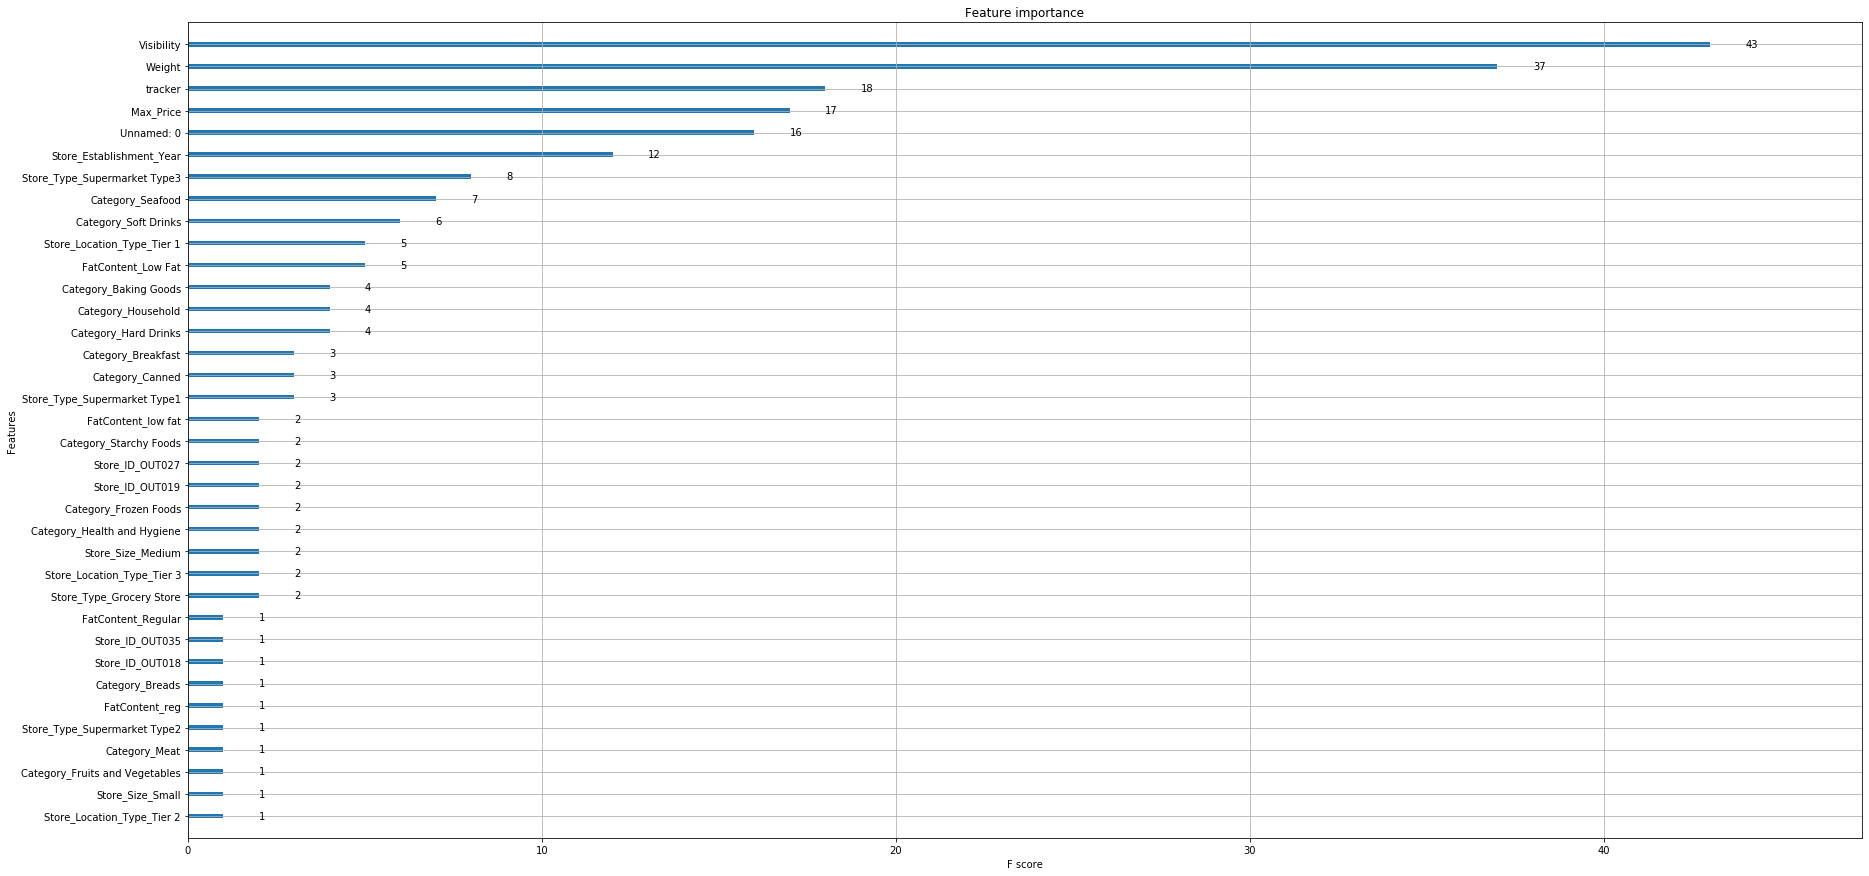

In [65]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [30,10]
plt.show()

In [ ]:
r2 = r2_score(y_test, preds)
print("R2 Score: %f" % (r2))



In [ ]:
preds = xg_reg.predict(X_test)


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))